<a href="https://colab.research.google.com/github/ChoChangyeon/ML-Machine-Learning-/blob/main/kNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

insurance_dataset = pd.read_csv('/content/Preprocessing_Data.csv')
# 전처리 작업 거친 데이터 불오기

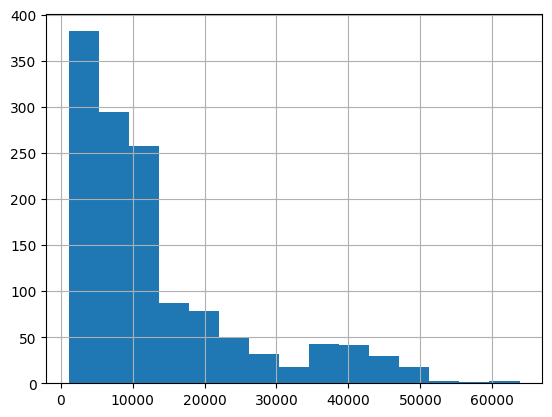

In [ ]:
insurance_dataset['charges'].hist(bins=15)
plt.show()

In [ ]:
def normalization(Datasets):
  '''
  :parameter_dataset: un-normalized dataset
  :return: normalized dataset, minVals, ranges that used to normalize test-tuple
  '''
  minVals = Datasets.min(axis=0)
  maxVals = Datasets.max(axis=0)
  ranges = maxVals-minVals
  m = Datasets.shape[0]
  normMatrix = Datasets - np.tile(minVals,(m,1))
  normMatrix = normMatrix / np.tile(ranges,(m,1))
  return normMatrix

insurance_dataset_norm = normalization(insurance_dataset)

In [ ]:
data, target = insurance_dataset_norm[['age','sex','bmi','children','smoker','region']], insurance_dataset['charges']

print(data)
print(target)

           age  sex       bmi  children  smoker    region
0     0.021739  1.0  0.321227       0.0     0.0  1.000000
1     0.000000  0.0  0.479150       0.2     1.0  0.666667
2     0.217391  0.0  0.458434       0.6     1.0  0.666667
3     0.326087  0.0  0.181464       0.0     1.0  0.333333
4     0.304348  0.0  0.347592       0.0     1.0  0.333333
...        ...  ...       ...       ...     ...       ...
1333  0.695652  0.0  0.403820       0.6     1.0  0.333333
1334  0.000000  1.0  0.429379       0.0     1.0  0.000000
1335  0.000000  1.0  0.562012       0.0     1.0  0.666667
1336  0.065217  1.0  0.264730       0.0     1.0  1.000000
1337  0.934783  1.0  0.352704       0.0     0.0  0.333333

[1338 rows x 6 columns]
0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1333    10601
1334     2206
1335     1630
1336     2008
1337    29141
Name: charges, Length: 1338, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
Data_train, Data_test, Target_train, Target_test = train_test_split(data, target)

print(Data_train.shape)
print(Data_test.shape)
print(type(Data_train.shape))
print(type(Data_test.shape))

print(Target_train.shape)
print(Target_test.shape)
print(type(Target_train.shape))
print(type(Target_test.shape))

(1003, 6)
(335, 6)
<class 'tuple'>
<class 'tuple'>
(1003,)
(335,)
<class 'tuple'>
<class 'tuple'>


In [180]:
Target_test[282]

4237

In [ ]:
pip install mglearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import mglearn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir "/content/drive/My Drive/Insurance"
!cd "/content/drive/My Drive/Insurance"

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='region', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>,
        <Axes: xlabel='region', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='sex', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='smoker', ylabel='bmi'>,
        <Axes: xlabel='region', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='sex', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='ch

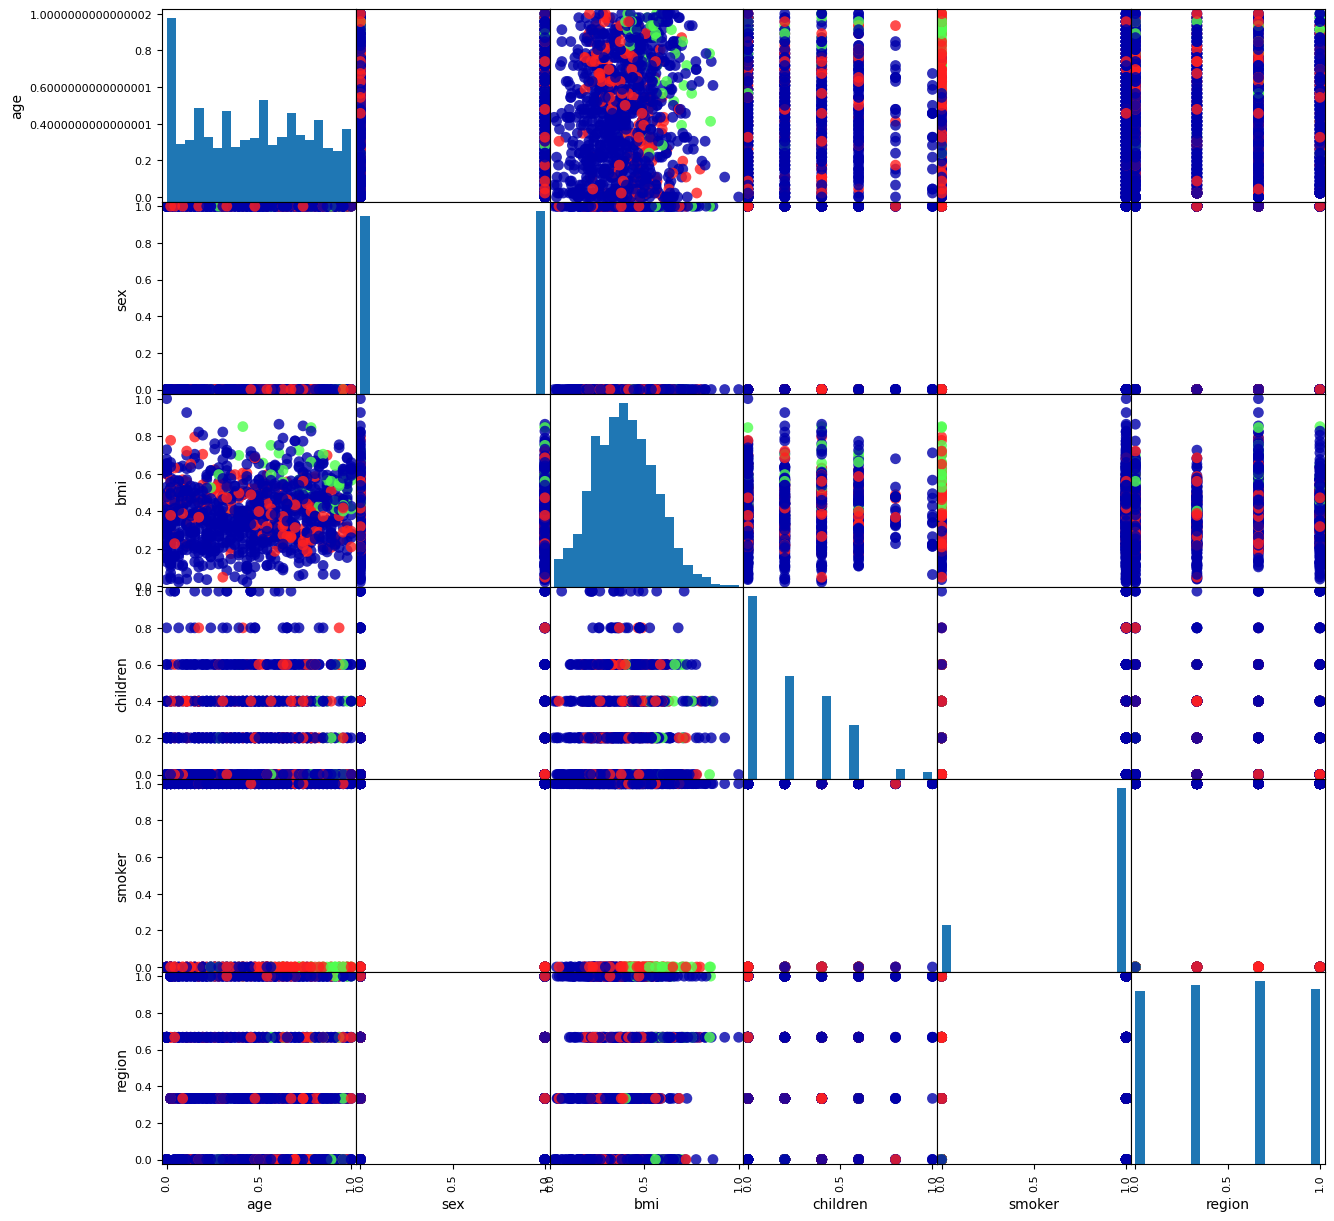

In [ ]:
Insurance_dataframe=pd.DataFrame(Data_train)
pd.plotting.scatter_matrix(Insurance_dataframe,c=Target_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=mglearn.cm3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(Data_train,Target_train)

KNeighborsClassifier(n_neighbors=2)

In [174]:
prediction = knn.predict(Data_test)
prediction[0]

13143

In [ ]:
Target_test_list = list(Target_test)

Target_test_list[0]

13144

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(Target_test, prediction)))

Model accuracy score: 0.0239


In [172]:
Target_test_deviation = []
for i in range(0,335):
   a = Target_test_list[i] - prediction[i]
   Target_test_deviation.append(a)

Target_deviation = {'Deviation':Target_test_deviation}
Target_deviation_df = pd.DataFrame(Target_deviation)

Target_deviation_df

,Deviation
0,1
1,14358
2,-1697
3,290
4,808
...,...
330,-975
331,2075
332,5
333,16019


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Deviation'].plot(kind='hist', bins=20, title='Deviation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Deviation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Deviation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Deviation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Deviation'].plot(kind='line', figsize=(8, 4), title='Deviation')
plt.gca().spines[['top', 'right']].set_visible(False)

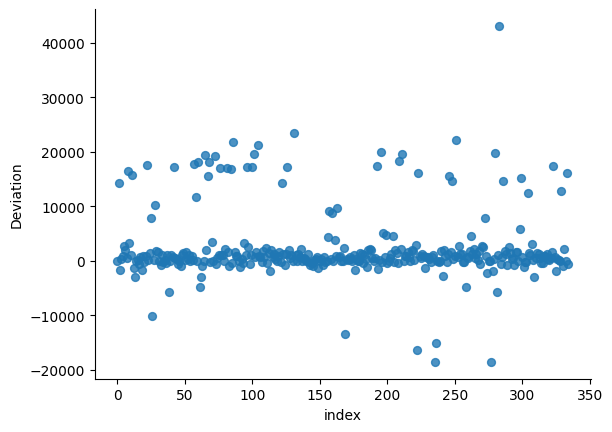

In [182]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Deviation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

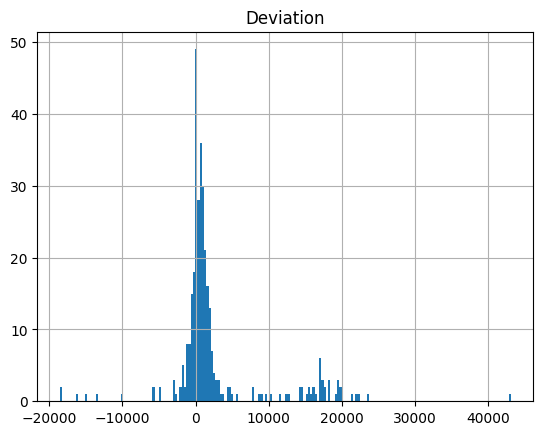

In [170]:
Target_deviation_df.hist(bins = 200)
plt.show()